In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
dataset = pd.read_csv("musicdataset.csv")

In [3]:
dataset.shape

(264158, 39)

In [4]:

dataset.head()

,Unnamed: 0,rating,length,energy,acousticness,valence,speechiness,instrumentalness,liveness,tempo,...,genre_latin_5star,genre_folk_5star,genre_blues_5star,genre_rap_5star,genre_reggae_5star,genre_jazz_5star,genre_rnb_5star,genre_country_5star,genre_electronic_5star,genre_pop_rock_5star
0,0,1.0,274.0,0.654033,0.058765,0.314221,0.108251,0.023829,0.082267,133.073690,...,0.076923,0.153846,0.153846,0.000000,0.153846,0.076923,0.076923,0.076923,0.153846,0.076923
1,1,4.0,210.0,0.953909,0.000001,0.401971,0.038095,0.011565,0.166306,99.320907,...,0.000000,0.095238,0.095238,0.142857,0.095238,0.095238,0.333333,0.047619,0.047619,0.047619
2,2,5.0,139.0,0.796526,0.072641,0.500425,0.025489,0.047326,0.036109,139.755087,...,0.062500,0.078125,0.046875,0.140625,0.078125,0.125000,0.140625,0.156250,0.078125,0.093750
3,3,3.0,158.0,0.695379,0.082420,0.234390,0.053510,0.016667,0.090654,132.915376,...,0.040000,0.120000,0.080000,0.160000,0.160000,0.240000,0.040000,0.080000,0.080000,0.000000
4,4,5.0,216.0,0.500655,0.160285,0.613583,0.059547,0.040171,0.078360,96.155064,...,0.048780,0.024390,0.195122,0.146341,0.024390,0.170732,0.073171,0.146341,0.097561,0.073171


In [5]:
dataset.columns

Index(['Unnamed: 0', 'rating', 'length', 'energy', 'acousticness', 'valence',
       'speechiness', 'instrumentalness', 'liveness', 'tempo', 'danceability',
       'genre_latin', 'genre_folk', 'genre_blues', 'genre_rap', 'genre_reggae',
       'genre_jazz', 'genre_rnb', 'genre_country', 'genre_electronic',
       'genre_pop_rock', 'energy_5star', 'acousticness_5star', 'valence_5star',
       'speechiness_5star', 'instrumentalness_5star', 'liveness_5star',
       'tempo_5star', 'danceability_5star', 'genre_latin_5star',
       'genre_folk_5star', 'genre_blues_5star', 'genre_rap_5star',
       'genre_reggae_5star', 'genre_jazz_5star', 'genre_rnb_5star',
       'genre_country_5star', 'genre_electronic_5star',
       'genre_pop_rock_5star'],
      dtype='object')

In [6]:
dataset.rating.value_counts()

rating
4.0    77281
3.0    74171
5.0    58109
2.0    38756
1.0    15841
Name: count, dtype: int64

In [7]:
dataset.rating.value_counts()/dataset.shape[0]*100

rating
4.0    29.255597
3.0    28.078271
5.0    21.997819
2.0    14.671522
1.0     5.996790
Name: count, dtype: float64

In [8]:
dataset["new_rating"] = dataset["rating"].map({4.0:"positive", 5.0:"positive", 1.0:"negative", 2.0:"negative", 3.0:"negative"})

In [9]:
dataset.new_rating.value_counts()/dataset.shape[0]*100


new_rating
positive    51.253417
negative    48.746583
Name: count, dtype: float64

In [10]:
dataset.head()

,Unnamed: 0,rating,length,energy,acousticness,valence,speechiness,instrumentalness,liveness,tempo,...,genre_folk_5star,genre_blues_5star,genre_rap_5star,genre_reggae_5star,genre_jazz_5star,genre_rnb_5star,genre_country_5star,genre_electronic_5star,genre_pop_rock_5star,new_rating
0,0,1.0,274.0,0.654033,0.058765,0.314221,0.108251,0.023829,0.082267,133.073690,...,0.153846,0.153846,0.000000,0.153846,0.076923,0.076923,0.076923,0.153846,0.076923,negative
1,1,4.0,210.0,0.953909,0.000001,0.401971,0.038095,0.011565,0.166306,99.320907,...,0.095238,0.095238,0.142857,0.095238,0.095238,0.333333,0.047619,0.047619,0.047619,positive
2,2,5.0,139.0,0.796526,0.072641,0.500425,0.025489,0.047326,0.036109,139.755087,...,0.078125,0.046875,0.140625,0.078125,0.125000,0.140625,0.156250,0.078125,0.093750,positive
3,3,3.0,158.0,0.695379,0.082420,0.234390,0.053510,0.016667,0.090654,132.915376,...,0.120000,0.080000,0.160000,0.160000,0.240000,0.040000,0.080000,0.080000,0.000000,negative
4,4,5.0,216.0,0.500655,0.160285,0.613583,0.059547,0.040171,0.078360,96.155064,...,0.024390,0.195122,0.146341,0.024390,0.170732,0.073171,0.146341,0.097561,0.073171,positive


In [11]:
dataset.describe()

,Unnamed: 0,rating,length,energy,acousticness,valence,speechiness,instrumentalness,liveness,tempo,...,genre_latin_5star,genre_folk_5star,genre_blues_5star,genre_rap_5star,genre_reggae_5star,genre_jazz_5star,genre_rnb_5star,genre_country_5star,genre_electronic_5star,genre_pop_rock_5star
count,264158.000000,264158.000000,264158.000000,264158.000000,264158.000000,264158.000000,264158.000000,264158.000000,264158.000000,264158.000000,...,264158.000000,264158.000000,264158.000000,264158.000000,264158.000000,264158.000000,264158.000000,264158.000000,264158.000000,264158.000000
mean,132078.500000,3.465861,252.356514,0.642869,0.247782,0.502942,0.066754,0.183855,0.174988,124.449174,...,0.111850,0.097443,0.087657,0.106167,0.105178,0.119885,0.110708,0.092538,0.090627,0.077947
std,76255.990542,1.158462,100.485803,0.254021,0.302673,0.256074,0.048326,0.306458,0.117771,30.299482,...,0.072857,0.064264,0.064635,0.076642,0.072698,0.082833,0.074662,0.061274,0.060484,0.055240
min,0.000000,1.000000,4.000000,0.000020,0.000001,0.000000,0.022800,0.000000,0.017400,49.464000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66039.250000,3.000000,199.000000,0.464745,0.010899,0.302793,0.022800,0.000000,0.091091,100.175563,...,0.066667,0.058824,0.046512,0.064516,0.060606,0.071429,0.065217,0.055556,0.052632,0.045455
50%,132078.500000,4.000000,236.000000,0.681601,0.094395,0.499168,0.052418,0.025267,0.133411,122.291704,...,0.106383,0.095238,0.083333,0.098361,0.093023,0.103448,0.103448,0.090909,0.087719,0.078125
75%,198117.750000,4.000000,281.000000,0.856221,0.421665,0.704470,0.094690,0.200590,0.236309,143.662861,...,0.152542,0.125000,0.119048,0.140625,0.136364,0.160714,0.142857,0.125000,0.125000,0.105263
max,264157.000000,5.000000,3024.000000,0.999000,0.996000,0.989000,0.212000,0.992000,0.601000,219.004000,...,1.000000,1.000000,0.666667,0.800000,0.538462,1.000000,1.000000,0.500000,1.000000,0.666667


In [12]:
dataset.isnull().sum()

Unnamed: 0                0
rating                    0
length                    0
energy                    0
acousticness              0
valence                   0
speechiness               0
instrumentalness          0
liveness                  0
tempo                     0
danceability              0
genre_latin               0
genre_folk                0
genre_blues               0
genre_rap                 0
genre_reggae              0
genre_jazz                0
genre_rnb                 0
genre_country             0
genre_electronic          0
genre_pop_rock            0
energy_5star              0
acousticness_5star        0
valence_5star             0
speechiness_5star         0
instrumentalness_5star    0
liveness_5star            0
tempo_5star               0
danceability_5star        0
genre_latin_5star         0
genre_folk_5star          0
genre_blues_5star         0
genre_rap_5star           0
genre_reggae_5star        0
genre_jazz_5star          0
genre_rnb_5star     

In [13]:
dataset.dtypes

Unnamed: 0                  int64
rating                    float64
length                    float64
energy                    float64
acousticness              float64
valence                   float64
speechiness               float64
instrumentalness          float64
liveness                  float64
tempo                     float64
danceability              float64
genre_latin               float64
genre_folk                float64
genre_blues               float64
genre_rap                 float64
genre_reggae              float64
genre_jazz                float64
genre_rnb                 float64
genre_country             float64
genre_electronic          float64
genre_pop_rock            float64
energy_5star              float64
acousticness_5star        float64
valence_5star             float64
speechiness_5star         float64
instrumentalness_5star    float64
liveness_5star            float64
tempo_5star               float64
danceability_5star        float64
genre_latin_5s

/tmp/ipykernel_19950/878657968.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


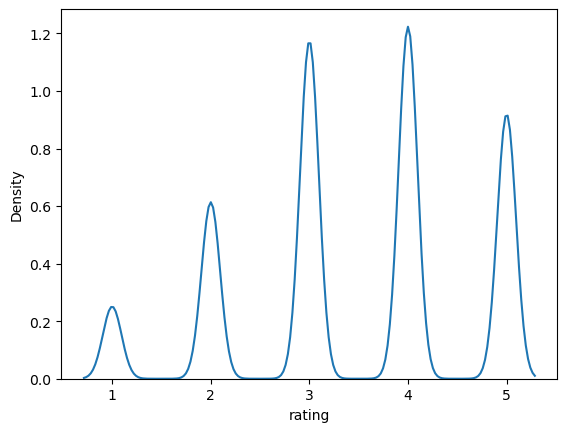

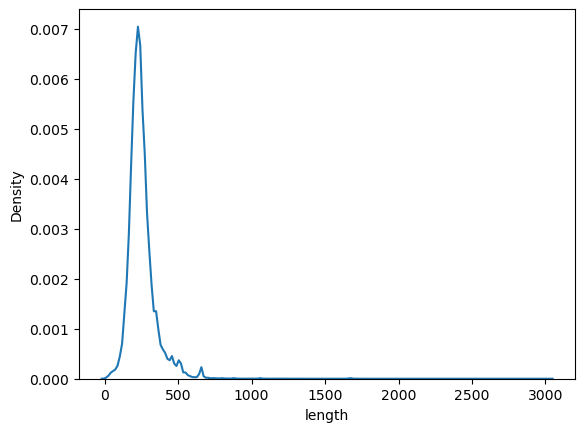

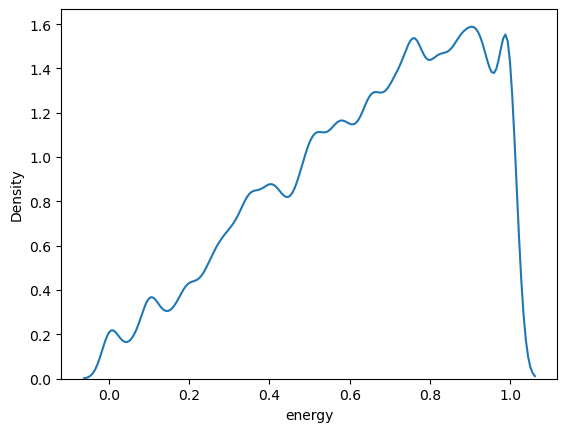

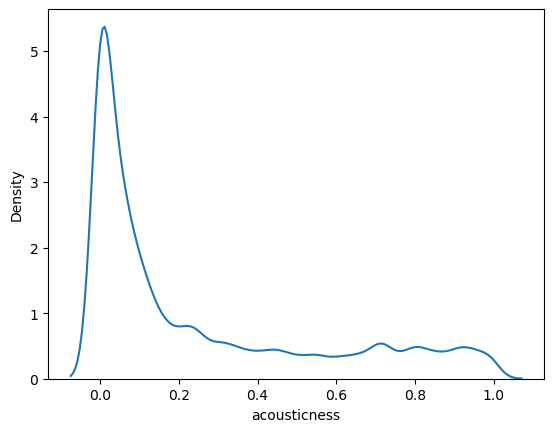

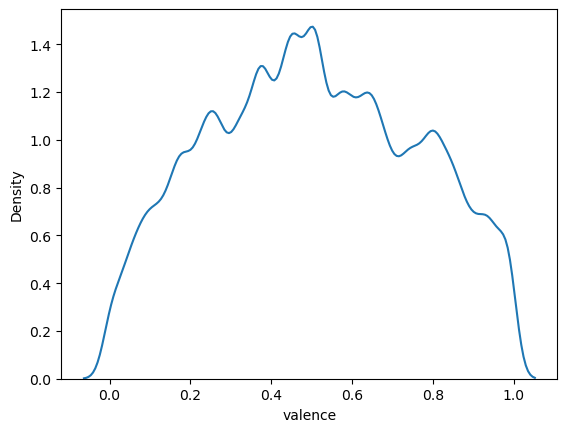

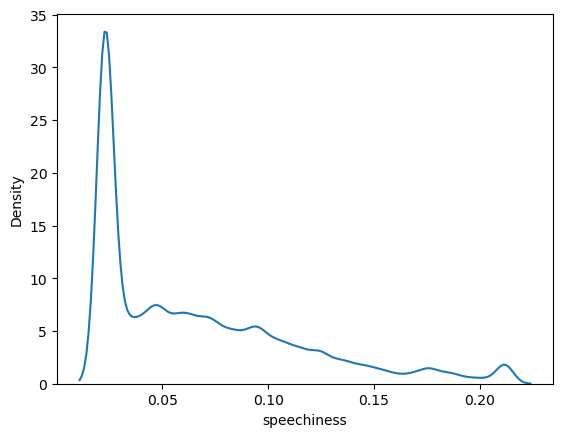

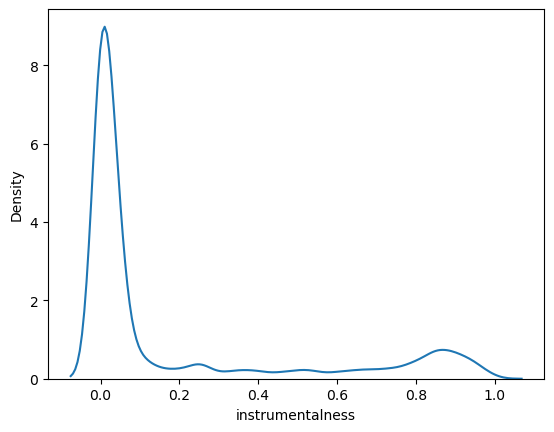

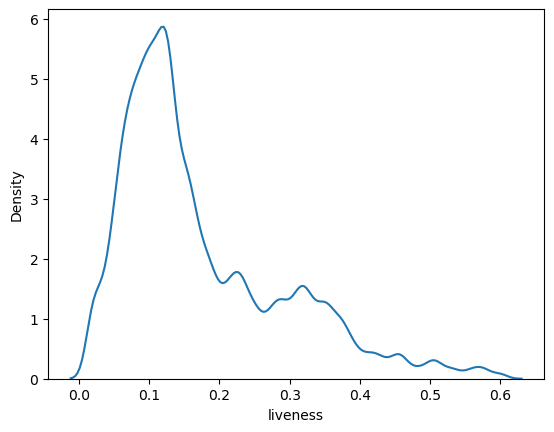

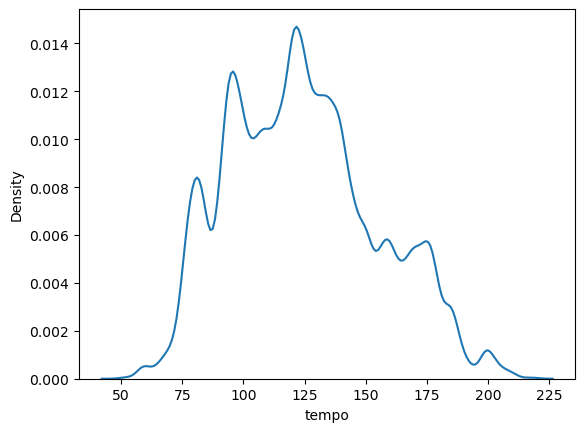

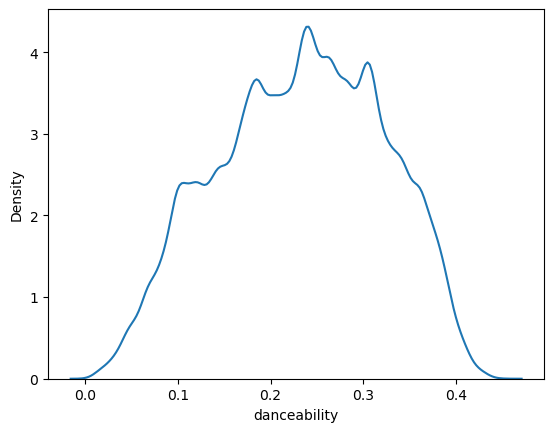

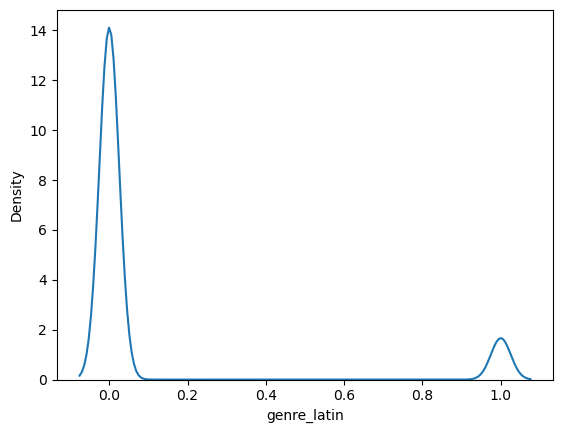

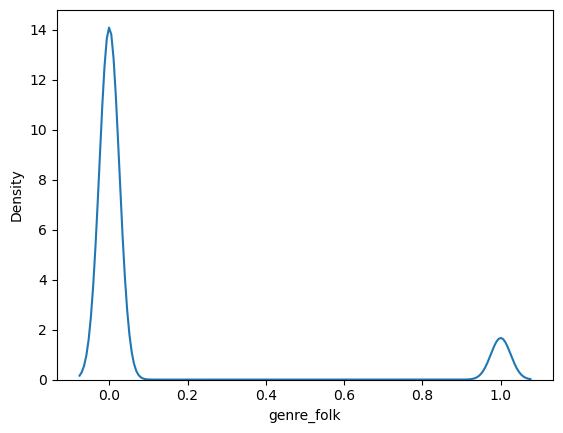

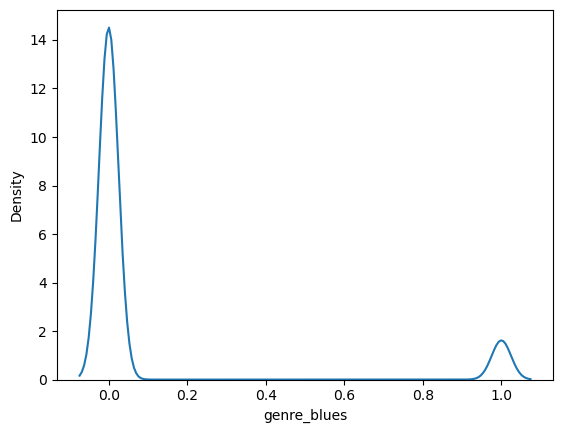

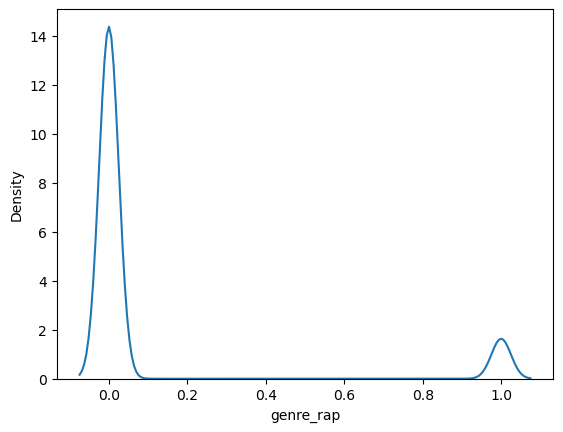

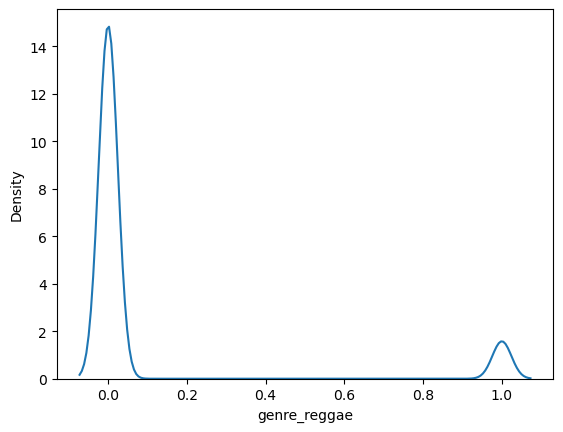

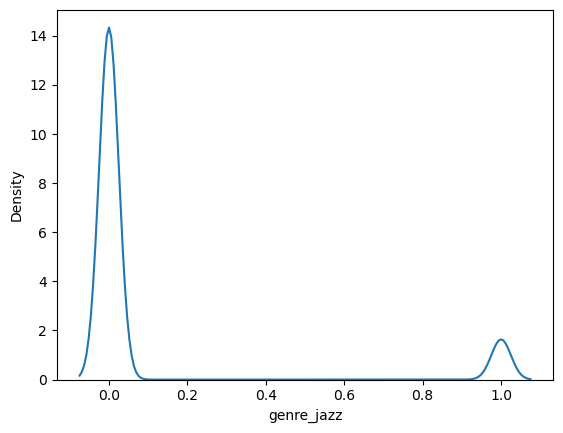

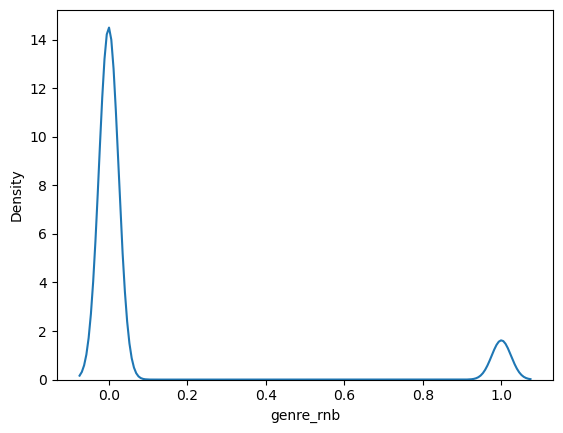

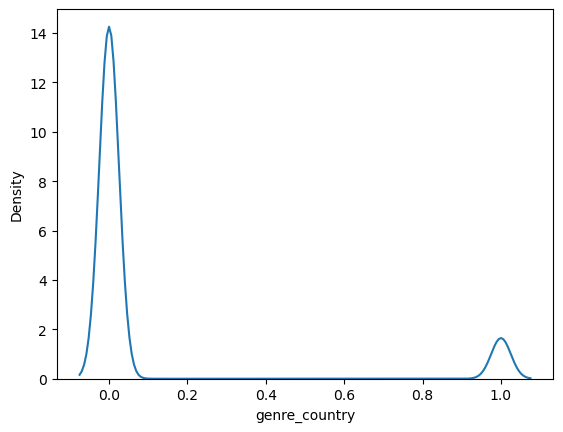

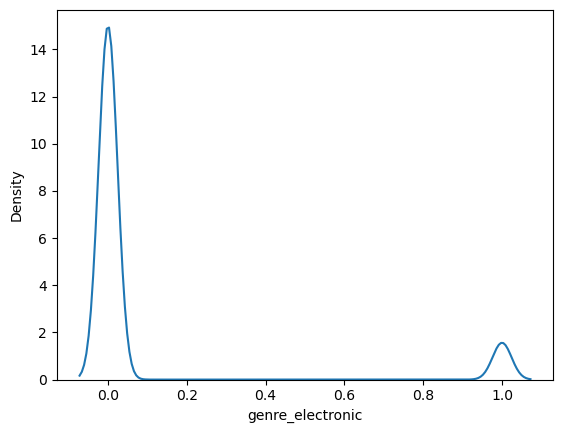

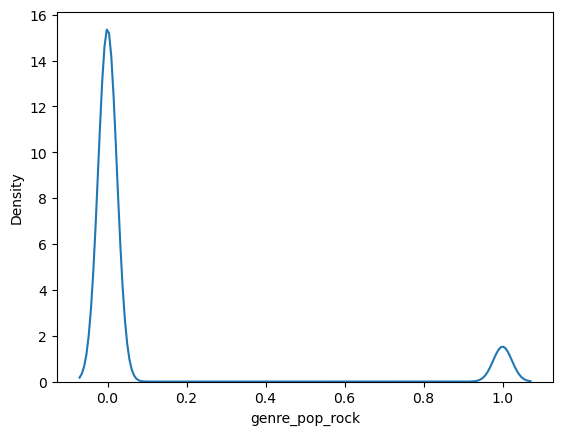

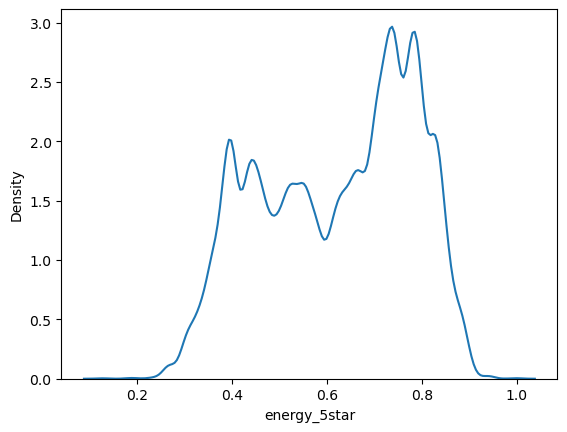

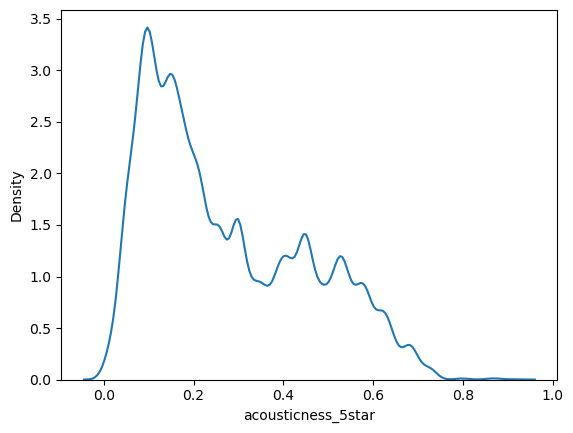

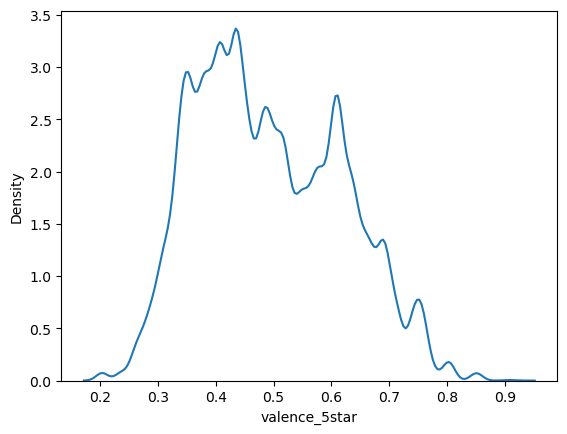

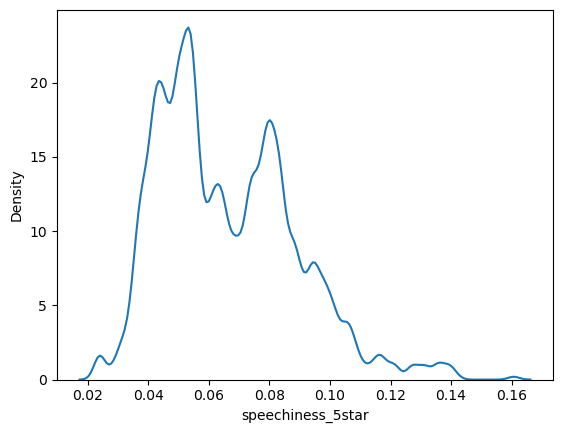

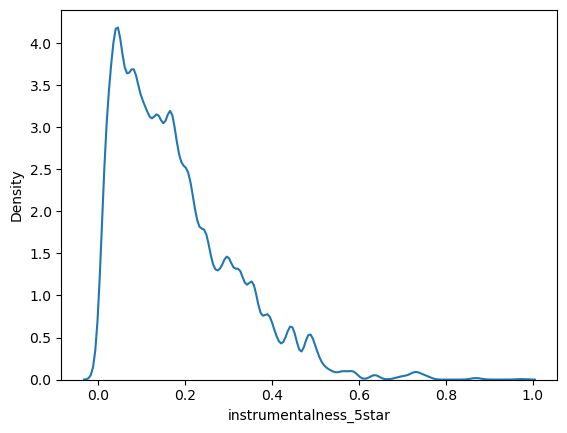

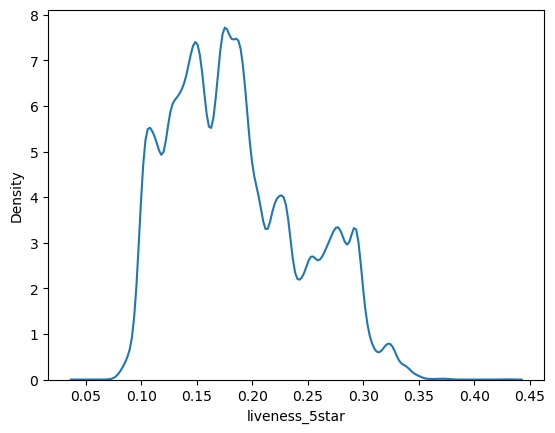

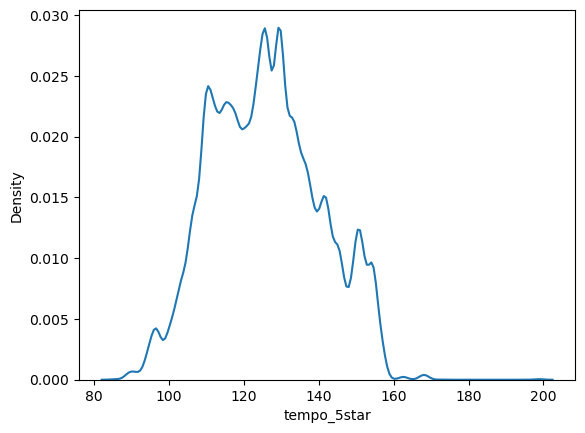

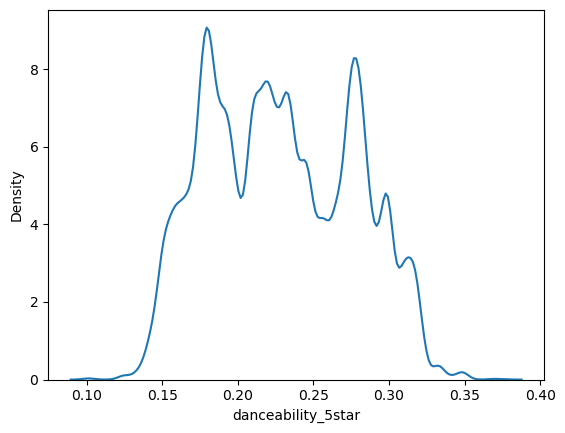

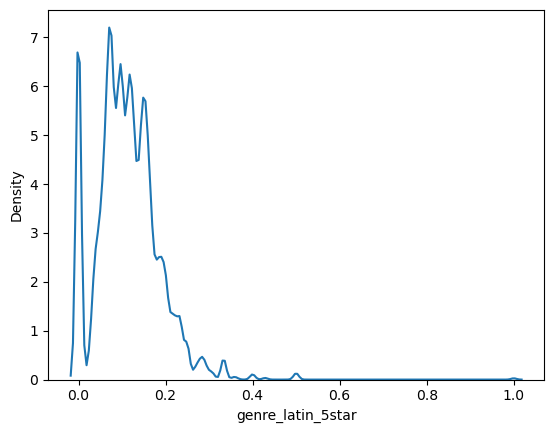

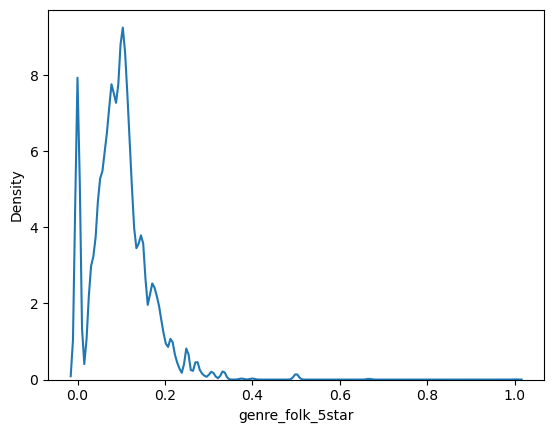

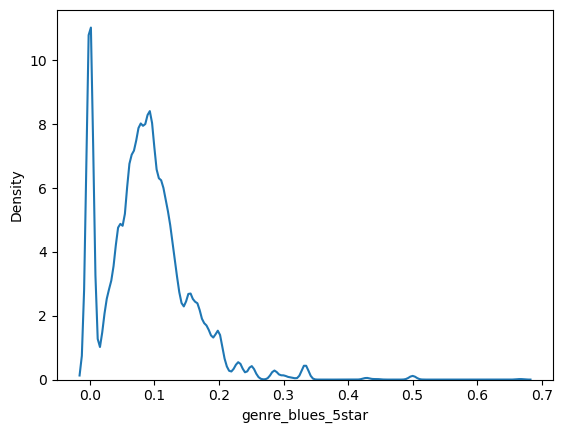

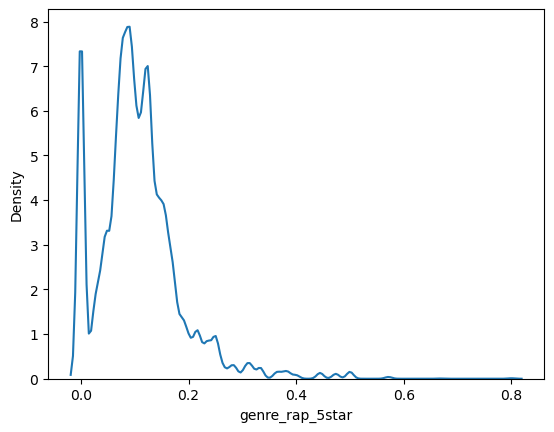

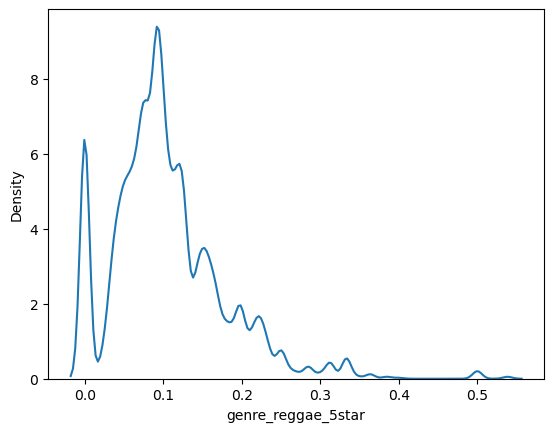

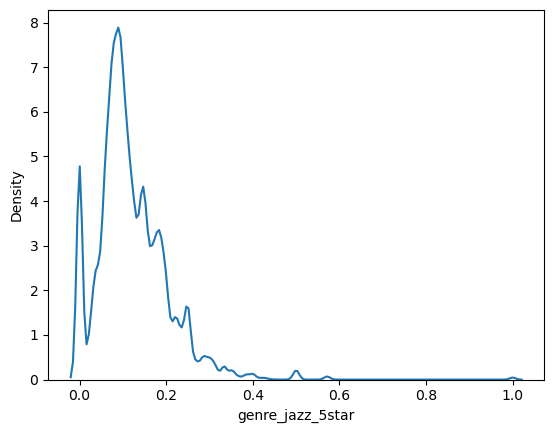

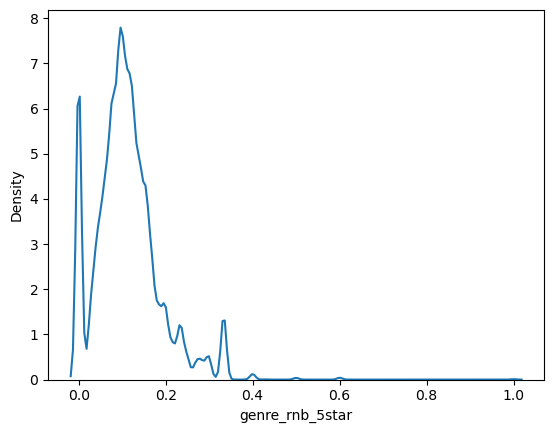

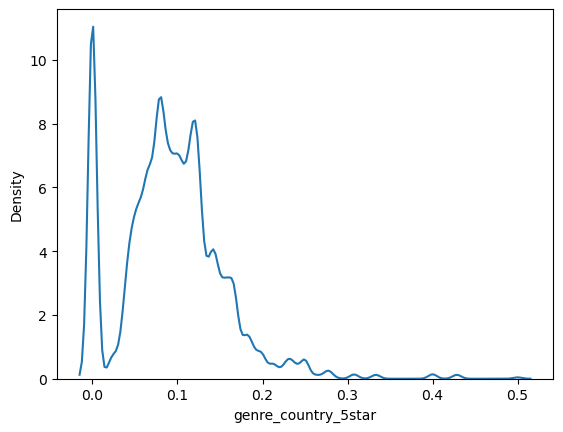

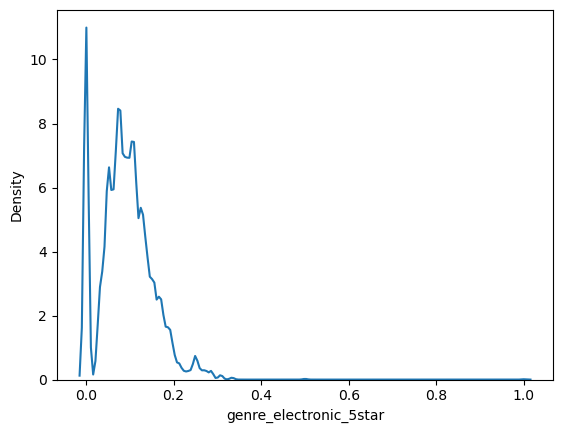

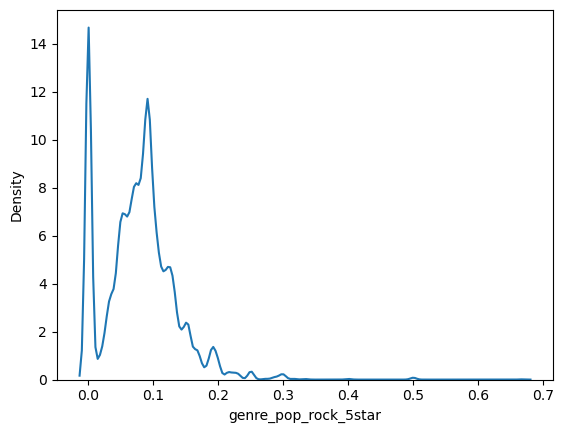

In [14]:
for x in dataset.columns[dataset.dtypes==float]:
    plt.figure()
    sns.kdeplot(x=x, data=dataset)
    plt.plot()

In [15]:
dataset.head()

,Unnamed: 0,rating,length,energy,acousticness,valence,speechiness,instrumentalness,liveness,tempo,...,genre_folk_5star,genre_blues_5star,genre_rap_5star,genre_reggae_5star,genre_jazz_5star,genre_rnb_5star,genre_country_5star,genre_electronic_5star,genre_pop_rock_5star,new_rating
0,0,1.0,274.0,0.654033,0.058765,0.314221,0.108251,0.023829,0.082267,133.073690,...,0.153846,0.153846,0.000000,0.153846,0.076923,0.076923,0.076923,0.153846,0.076923,negative
1,1,4.0,210.0,0.953909,0.000001,0.401971,0.038095,0.011565,0.166306,99.320907,...,0.095238,0.095238,0.142857,0.095238,0.095238,0.333333,0.047619,0.047619,0.047619,positive
2,2,5.0,139.0,0.796526,0.072641,0.500425,0.025489,0.047326,0.036109,139.755087,...,0.078125,0.046875,0.140625,0.078125,0.125000,0.140625,0.156250,0.078125,0.093750,positive
3,3,3.0,158.0,0.695379,0.082420,0.234390,0.053510,0.016667,0.090654,132.915376,...,0.120000,0.080000,0.160000,0.160000,0.240000,0.040000,0.080000,0.080000,0.000000,negative
4,4,5.0,216.0,0.500655,0.160285,0.613583,0.059547,0.040171,0.078360,96.155064,...,0.024390,0.195122,0.146341,0.024390,0.170732,0.073171,0.146341,0.097561,0.073171,positive


In [16]:
dataset[dataset.columns[dataset.dtypes!=object][2:]]

,length,energy,acousticness,valence,speechiness,instrumentalness,liveness,tempo,danceability,genre_latin,...,genre_latin_5star,genre_folk_5star,genre_blues_5star,genre_rap_5star,genre_reggae_5star,genre_jazz_5star,genre_rnb_5star,genre_country_5star,genre_electronic_5star,genre_pop_rock_5star
0,274.0,0.654033,0.058765,0.314221,0.108251,0.023829,0.082267,133.073690,0.167896,1.0,...,0.076923,0.153846,0.153846,0.000000,0.153846,0.076923,0.076923,0.076923,0.153846,0.076923
1,210.0,0.953909,0.000001,0.401971,0.038095,0.011565,0.166306,99.320907,0.232613,0.0,...,0.000000,0.095238,0.095238,0.142857,0.095238,0.095238,0.333333,0.047619,0.047619,0.047619
2,139.0,0.796526,0.072641,0.500425,0.025489,0.047326,0.036109,139.755087,0.233391,0.0,...,0.062500,0.078125,0.046875,0.140625,0.078125,0.125000,0.140625,0.156250,0.078125,0.093750
3,158.0,0.695379,0.082420,0.234390,0.053510,0.016667,0.090654,132.915376,0.148920,1.0,...,0.040000,0.120000,0.080000,0.160000,0.160000,0.240000,0.040000,0.080000,0.080000,0.000000
4,216.0,0.500655,0.160285,0.613583,0.059547,0.040171,0.078360,96.155064,0.241976,1.0,...,0.048780,0.024390,0.195122,0.146341,0.024390,0.170732,0.073171,0.146341,0.097561,0.073171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264153,210.0,0.665185,0.099393,0.178234,0.134950,0.000000,0.065673,109.668407,0.126556,0.0,...,0.231884,0.086957,0.028986,0.086957,0.057971,0.115942,0.072464,0.101449,0.101449,0.115942
264154,330.0,0.519984,0.714804,0.237678,0.050984,0.012274,0.114350,134.684381,0.134737,0.0,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.166667,0.166667,0.166667,0.166667,0.000000
264155,139.0,0.571354,0.341085,0.619888,0.115373,0.006805,0.100610,75.725009,0.253163,0.0,...,0.160000,0.160000,0.160000,0.040000,0.200000,0.000000,0.080000,0.120000,0.000000,0.080000
264156,251.0,0.291619,0.180024,0.053671,0.022800,0.006020,0.367294,127.818126,0.081993,0.0,...,0.068966,0.103448,0.000000,0.103448,0.172414,0.034483,0.241379,0.103448,0.137931,0.034483


In [17]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
dataset[dataset.columns[dataset.dtypes!=object][2:]] = scale.fit_transform(dataset[dataset.columns[dataset.dtypes!=object][2:]])

In [18]:
dataset.head()

,Unnamed: 0,rating,length,energy,acousticness,valence,speechiness,instrumentalness,liveness,tempo,...,genre_folk_5star,genre_blues_5star,genre_rap_5star,genre_reggae_5star,genre_jazz_5star,genre_rnb_5star,genre_country_5star,genre_electronic_5star,genre_pop_rock_5star,new_rating
0,0,1.0,0.215389,0.043950,-0.624494,-0.736979,0.858706,-0.522179,-0.787303,0.284643,...,0.877680,1.024048,-1.385235,0.669453,-0.518663,-0.452505,-0.254839,1.045222,-0.018536,negative
1,1,4.0,-0.421518,1.224470,-0.818645,-0.394303,-0.593035,-0.562197,-0.073722,-0.829331,...,-0.034312,0.117290,0.478730,-0.136732,-0.297555,2.981761,-0.733088,-0.711058,-0.549022,positive
2,2,5.0,-1.128087,0.604899,-0.578649,-0.009827,-0.853891,-0.445507,-1.179240,0.505155,...,-0.300606,-0.630963,0.449605,-0.372132,0.061745,0.400696,1.039796,-0.206696,0.286078,positive
3,3,3.0,-0.939005,0.206716,-0.546342,-1.048727,-0.274053,-0.545550,-0.716088,0.279418,...,0.351005,-0.118468,0.702406,0.754103,1.450081,-0.947039,-0.204623,-0.175696,-1.411061,negative
4,4,5.0,-0.361808,-0.559855,-0.289082,0.432066,-0.149131,-0.468853,-0.820477,-0.933817,...,-1.136764,1.662649,0.524192,-1.111282,0.613841,-0.502762,0.878087,0.114645,-0.086464,positive


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset["new_rating"] = encoder.fit_transform(dataset["new_rating"])

In [20]:
dataset.head()

,Unnamed: 0,rating,length,energy,acousticness,valence,speechiness,instrumentalness,liveness,tempo,...,genre_folk_5star,genre_blues_5star,genre_rap_5star,genre_reggae_5star,genre_jazz_5star,genre_rnb_5star,genre_country_5star,genre_electronic_5star,genre_pop_rock_5star,new_rating
0,0,1.0,0.215389,0.043950,-0.624494,-0.736979,0.858706,-0.522179,-0.787303,0.284643,...,0.877680,1.024048,-1.385235,0.669453,-0.518663,-0.452505,-0.254839,1.045222,-0.018536,0
1,1,4.0,-0.421518,1.224470,-0.818645,-0.394303,-0.593035,-0.562197,-0.073722,-0.829331,...,-0.034312,0.117290,0.478730,-0.136732,-0.297555,2.981761,-0.733088,-0.711058,-0.549022,1
2,2,5.0,-1.128087,0.604899,-0.578649,-0.009827,-0.853891,-0.445507,-1.179240,0.505155,...,-0.300606,-0.630963,0.449605,-0.372132,0.061745,0.400696,1.039796,-0.206696,0.286078,1
3,3,3.0,-0.939005,0.206716,-0.546342,-1.048727,-0.274053,-0.545550,-0.716088,0.279418,...,0.351005,-0.118468,0.702406,0.754103,1.450081,-0.947039,-0.204623,-0.175696,-1.411061,0
4,4,5.0,-0.361808,-0.559855,-0.289082,0.432066,-0.149131,-0.468853,-0.820477,-0.933817,...,-1.136764,1.662649,0.524192,-1.111282,0.613841,-0.502762,0.878087,0.114645,-0.086464,1


In [21]:
dataset.columns[2:38]

Index(['length', 'energy', 'acousticness', 'valence', 'speechiness',
       'instrumentalness', 'liveness', 'tempo', 'danceability', 'genre_latin',
       'genre_folk', 'genre_blues', 'genre_rap', 'genre_reggae', 'genre_jazz',
       'genre_rnb', 'genre_country', 'genre_electronic', 'genre_pop_rock',
       'energy_5star', 'acousticness_5star', 'valence_5star',
       'speechiness_5star', 'instrumentalness_5star', 'liveness_5star',
       'tempo_5star', 'danceability_5star', 'genre_latin_5star',
       'genre_folk_5star', 'genre_blues_5star', 'genre_rap_5star',
       'genre_reggae_5star', 'genre_jazz_5star', 'genre_rnb_5star',
       'genre_country_5star', 'genre_electronic_5star'],
      dtype='object')

In [22]:
x = dataset[dataset.columns[2:38]]

In [23]:
y = dataset.new_rating

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=12)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
ans = model.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score = accuracy_score(y_test, ans)
print(score*100)

81.85380072683223


In [27]:
score = confusion_matrix(y_test, ans)
print(score)

[[21080  4672]
 [ 4915 22165]]


<Axes: >

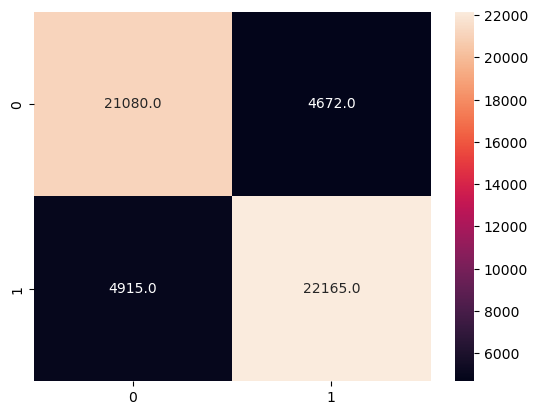

In [28]:
sns.heatmap(score, fmt=".1f", annot=True)

In [29]:
score = classification_report(y_test, ans)
print(score)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81     25752
           1       0.83      0.82      0.82     27080

    accuracy                           0.82     52832
   macro avg       0.82      0.82      0.82     52832
weighted avg       0.82      0.82      0.82     52832



In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=12)

In [31]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
kb = SelectKBest(f_classif, k=30)
kb.fit(x_train, y_train)


SelectKBest(k=30)

In [32]:
x_train.columns[kb.get_support()]

Index(['energy', 'acousticness', 'valence', 'speechiness', 'instrumentalness',
       'liveness', 'tempo', 'danceability', 'genre_folk', 'genre_rap',
       'genre_reggae', 'genre_jazz', 'genre_country', 'genre_electronic',
       'genre_pop_rock', 'energy_5star', 'acousticness_5star', 'valence_5star',
       'speechiness_5star', 'instrumentalness_5star', 'liveness_5star',
       'tempo_5star', 'danceability_5star', 'genre_latin_5star',
       'genre_folk_5star', 'genre_blues_5star', 'genre_rap_5star',
       'genre_reggae_5star', 'genre_rnb_5star', 'genre_country_5star'],
      dtype='object')

In [33]:
kb.get_support()
x_train = x_train[x_train.columns[kb.get_support()]]
x_test = x_test[x_test.columns[kb.get_support()]]

In [34]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
ans = model.predict(x_test)

In [36]:
score = accuracy_score(y_test, ans)
score*100

81.63045124167171

In [37]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 3.0 MB/s eta 0:00:0000:0100:01


In [38]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
ans = model.predict(x_test)

In [39]:
score = accuracy_score(y_test, ans)
print(score*100)

83.0140823743186


In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

In [40]:
from sklearn.model_selection import RandomizedSearchCV
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

classifier=XGBClassifier()

random_search = RandomizedSearchCV(classifier,
                                 param_distributions=params,
                                 n_iter=5, n_jobs=-1,cv=5,verbose=3)

In [41]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=3)

In [42]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [43]:
xgb_tune = XGBClassifier(random_state=0,min_child_weight=5,max_depth= 10,
                    learning_rate = 0.1,gamma= 0.4,
                    colsample_bytree= 0.7)
xgb_tune.fit(x_train,y_train)
y_pred_xgb_tune = xgb_tune.predict(x_test)

In [44]:
score = accuracy_score(y_test, y_pred_xgb_tune)
print(score*100)

85.57124470018171


In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<Axes: >

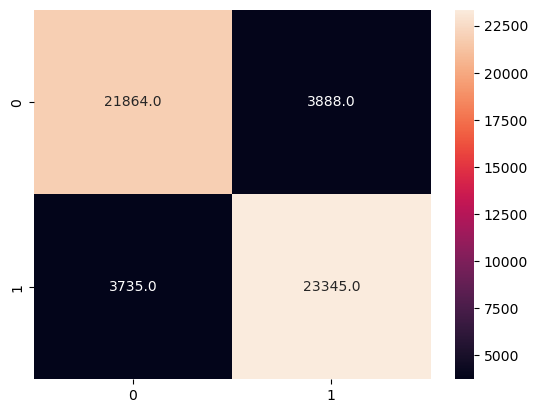

In [46]:
matrix = confusion_matrix(y_test, y_pred_xgb_tune)
sns.heatmap(matrix, annot=True, fmt=".1f")

In [47]:
report = classification_report(y_test, y_pred_xgb_tune)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     25752
           1       0.86      0.86      0.86     27080

    accuracy                           0.86     52832
   macro avg       0.86      0.86      0.86     52832
weighted avg       0.86      0.86      0.86     52832

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=1;, score=0.837 total time=  51.5s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=1;, score=0.840 total time=  48.9s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=7;, score=0.772 total time=  23.4s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=7;, score=0.778 total time=  23.4s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=7;, score=0.773 total time=  23.6s
[CV 5/5] END colsamp